                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8671
Date:                Fri, 21 Jun 2024   Prob (F-statistic):              0.356
Time:                        09:44:17   Log-Likelihood:                -27.524
No. Observations:                  61   AIC:                             59.05
Df Residuals:                      59   BIC:                             63.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3254      0.101     13.065      0.0

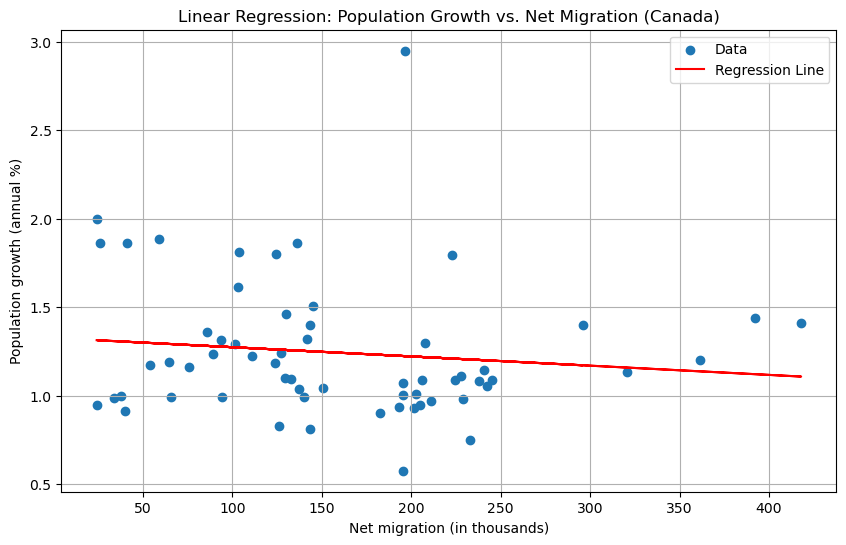

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv(r'..\data\processed\Canada-Select-Variables-In-Columns.csv')
df = pd.read_csv(file_path)

df['Net migration'] = pd.to_numeric(df['Net migration'], errors='coerce')
df['Population growth (annual %)'] = pd.to_numeric(df['Population growth (annual %)'], errors='coerce')

df = df.dropna(subset=['Net migration', 'Population growth (annual %)'])

df['Net migration'] = df['Net migration'] / 1000

net_migration = df['Net migration'].values
population_growth = df['Population growth (annual %)'].values

X = sm.add_constant(net_migration)
y = population_growth

model = sm.OLS(y, X).fit()

summary = model.summary()
print(summary)

conf_int = model.conf_int()
print(conf_int)

plt.figure(figsize=(10, 6))
plt.scatter(net_migration, population_growth, label='Data')
plt.plot(net_migration, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Net migration (in thousands)')
plt.ylabel('Population growth (annual %)')
plt.legend()
plt.title('Linear Regression: Population Growth vs. Net Migration (Canada)')
plt.grid(True)
plt.show()

Key Statistics from the Regression Output
Dependent Variable (y): Population Growth (annual %)
Independent Variable (x1): Net Migration (scaled by 1000)
Model Performance

R-squared (R²): 0.014
This value indicates that only 1.4% of the variance in the dependent variable (population growth) is explained by the independent variable (net migration). This is very low, mwhich means that net migration has little explanatory power in predicting annual population growth in this model.

Adjusted R-squared: -0.002
The adjusted R-squared value is slightly negative, indicating that the independent variable does not improve the fit of the model compared to a model without predictors. It even slightly degrades the prediction accuracy, indicating poor model fit.

F-statistic: 0.8671
The F-statistic tests whether the overall regression model fits the data well. A value of 0.8671 together with a high p-value (0.356) indicates that the model is not statistically significant and does not explain a significant amount of variation in the dependent variable.
p-value for the F-statistic: 0.356

This p-value is much higher than the commonly used threshold value of 0.05. This means that the relationship between net migration and population growth is not statistically significant, and there is a high probability that the observed relationship could be due to random chance.

Intercept (const): 1.3254

It is the expected value of the dependent variable (population growth) when the independent variable (net migration) is zero. Given a p-value of 0.000, this coefficient is statistically significant.
Net migration coefficient (x1): -0.0005

The coefficient of net migration is very close to zero (-0.0005), indicating a very weak inverse relationship with population growth. However, with a p-value of 0.356, this coefficient is not statistically significant, meaning we cannot say with certainty that net migration has any effect on population growth.

Confidence Intervals:
For the intercept: [1.122, 1.528]
For the coefficient of net migration: [-0.002, 0.001]
The confidence interval for the coefficient of net migration includes zero, confirming that the effect of net migration on population growth is not statistically different from zero.